Step 1: Install & Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.style.use("seaborn-v0_8-dark-palette")

Step 2: Load the Dataset

In [2]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("train.csv")
df.head()

Saving train.csv to train (1).csv


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Step 3: Data Cleaning & Preparation

In [3]:
# Check missing values
df.isnull().sum()

# Fill missing Age with median
df["Age"] = df["Age"].fillna(df["Age"].median())

# Drop Cabin (too many missing values)
df = df.drop(['Cabin'], axis=1, errors='ignore')

# Drop rows with missing Embarked
df.dropna(subset=["Embarked"], inplace=True)

print(df['Sex'].unique())  # Should show: ['male' 'female']

# Encode categorical variables
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
df["Embarked"] = df["Embarked"].map({"S": 0, "C": 1, "Q": 2})

# Feature Engineering: Family Size
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1


['male' 'female']


Step 4: Univariate Analysis

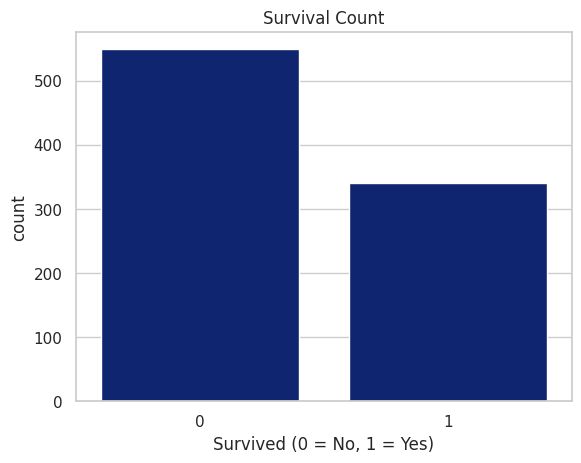

In [4]:
# Survival Count
sns.countplot(x="Survived", data=df)
plt.title("Survival Count")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.show()

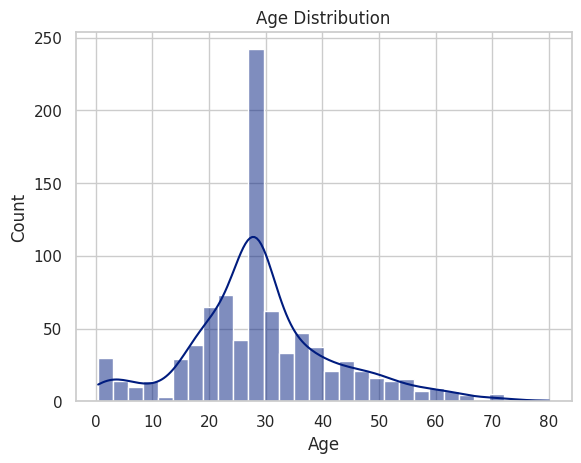

In [5]:
# Age Distribution
sns.histplot(df["Age"], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

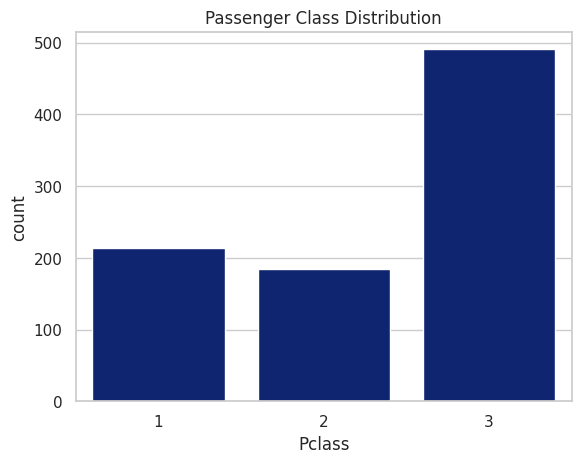

In [6]:
# Passenger Class Distribution
sns.countplot(x="Pclass", data=df)
plt.title("Passenger Class Distribution")
plt.show()

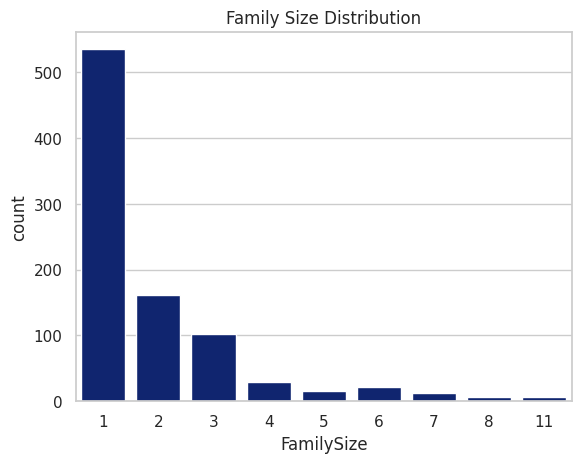

In [7]:
# Family Size Distribution
sns.countplot(x="FamilySize", data=df)
plt.title("Family Size Distribution")
plt.show()

Step 5: Bivariate Analysis – Survival by Features

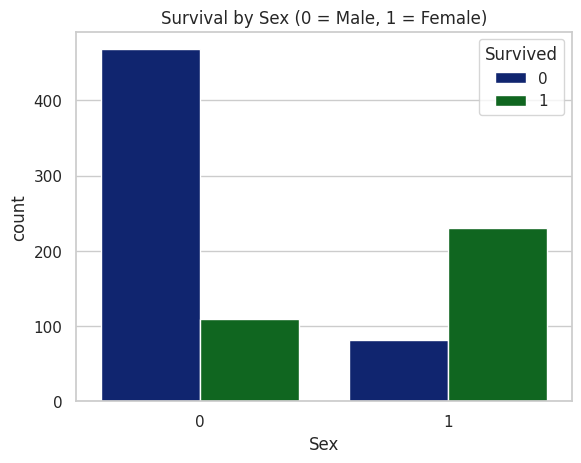

In [8]:
# Survival by Sex
df['Sex'] = df['Sex'].replace({'male': 0, 'female': 1})
sns.countplot(x="Sex", hue="Survived", data=df)
plt.title("Survival by Sex (0 = Male, 1 = Female)")
plt.show()

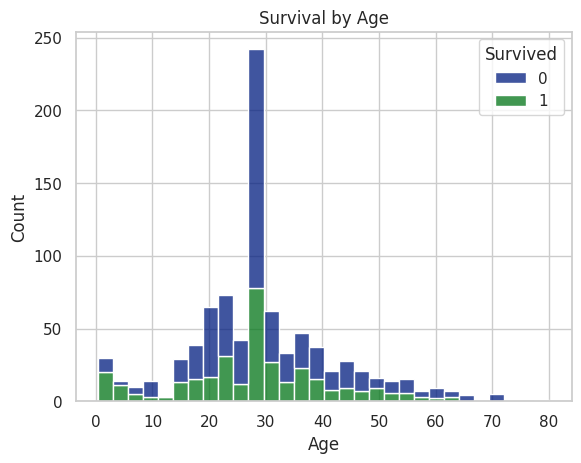

In [9]:
# Survival by Age
sns.histplot(data=df, x="Age", hue="Survived", bins=30, multiple="stack")
plt.title("Survival by Age")
plt.show()

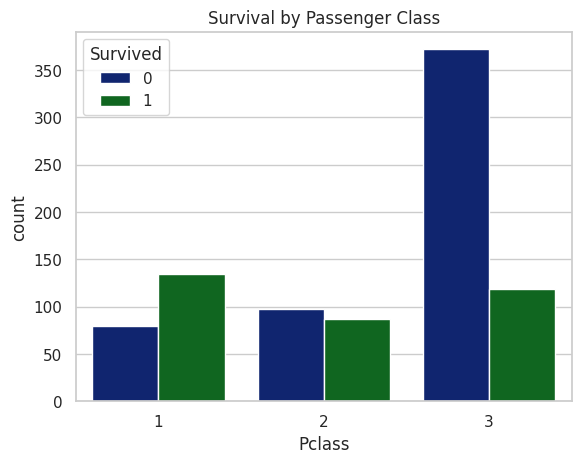

In [10]:
# Survival by Pclass
sns.countplot(x="Pclass", hue="Survived", data=df)
plt.title("Survival by Passenger Class")
plt.show()

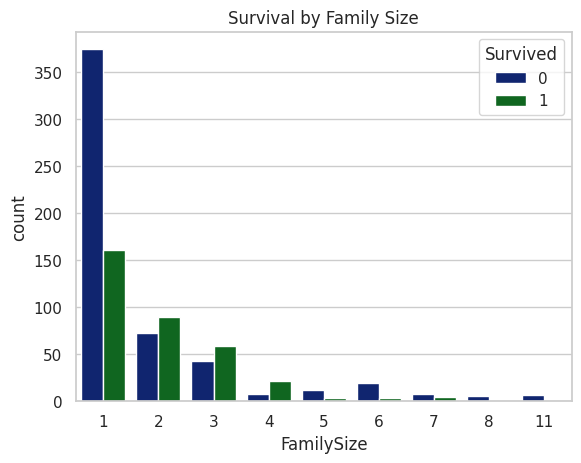

In [11]:
# Survival by Family Size
sns.countplot(x="FamilySize", hue="Survived", data=df)
plt.title("Survival by Family Size")
plt.show()

Step 6: Correlation Heatmap

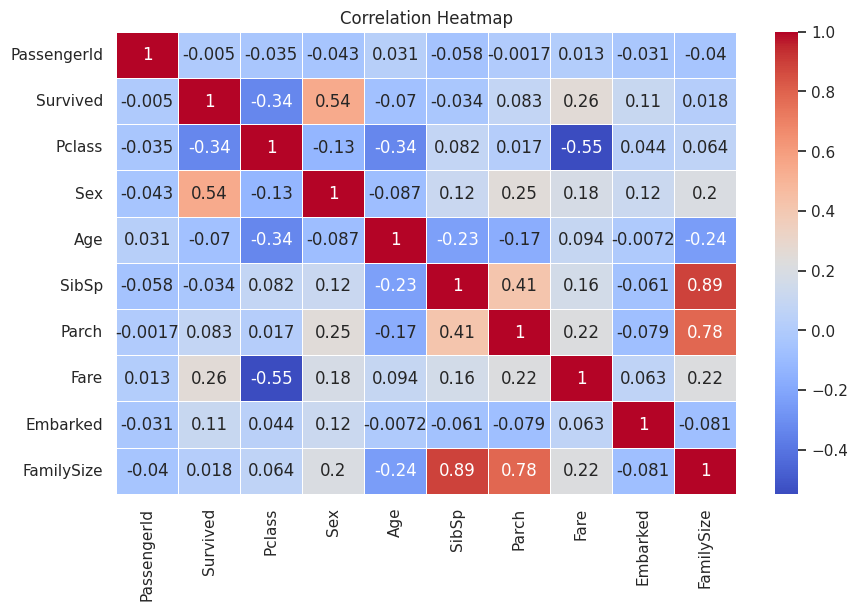

In [13]:
plt.figure(figsize=(10,6))

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute and plot correlation matrix
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()